In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt


import torchvision.transforms as transforms
from cifar10_loader import CIFAR10

In [2]:
fpath_synthetic_data = f"/home/edwardsb/repositories/nvidia_edm/class_6_batchsize_64_266_batches.pkl"

with open(fpath_synthetic_data, 'rb') as _file:  
    X_synth, Y_synth = pickle.load(_file)

print(f"Synthetic features have range: [{np.amin(X_synth)}, {np.amax(X_synth)}] and shape: {X_synth.shape}")
print(f"Synthetic labels have values: {np.unique(Y_synth)} and shape {Y_synth.shape}\n")
print(f"Synthetic feature type is: {X_synth.dtype} and Synthetic label type is {Y_synth.dtype}")

Synthetic features have range: [0.0, 1.0] and shape: (17024, 3, 32, 32)
Synthetic labels have values: [6] and shape (17024,)

Synthetic feature type is: float32 and Synthetic label type is int64


In [3]:
transform = transforms.Compose([transforms.ToTensor()])

cifar_train = CIFAR10(root="./data", train=True, download=True, transform=transform)
X_raw = cifar_train.data
Y_raw = cifar_train.targets

print(f"Raw features have range: [{np.amin(X_raw)}, {np.amax(X_raw)}] and shape: {X_raw.shape}")
print(f"Raw labels have values: {np.unique(Y_raw)} and length {len(Y_raw)}\n")
print(f"Faw feature data type is: {X_raw.dtype} and Raw label type is {type(Y_raw[0])}")

Files already downloaded and verified
Raw features have range: [0.0, 1.0] and shape: (50000, 3, 32, 32)
Raw labels have values: [0 1 2 3 4 5 6 7 8 9] and length 50000

Faw feature data type is: float32 and Raw label type is <class 'int'>


In [ ]:
# Let's get the frogs
frog_filter = np.zeros(len(Y_raw), dtype='bool')
for idx, label in enumerate(Y_raw):
    # print(label)
    if label == 6:
        frog_filter[idx] = True
# was a list
frog_filter = np.array(frog_filter)
X_raw_frogs = X_raw[frog_filter]

len(X_raw_frogs)


5000

In [5]:
X_raw_frogs[0:16].shape

(16, 3, 32, 32)

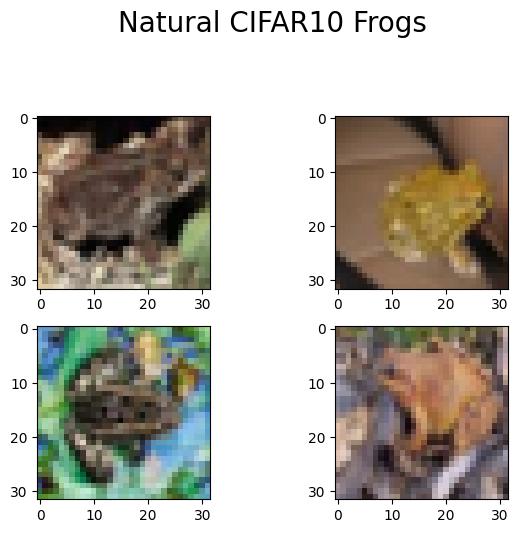

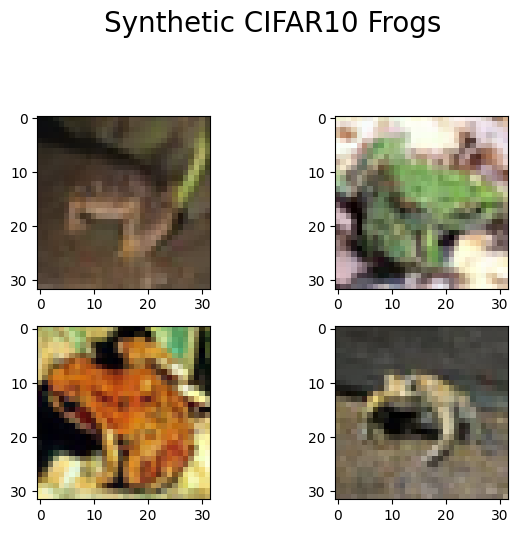

In [9]:
# Now plot them

"""
Below copied and modified from:
https://www.delftstack.com/howto/matplotlib/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/
"""

raw_fpath = '/raid/edwardsb/projects/fl_with_diffusion/images/raw_frogs_maybecleaner.png'

synth_fpath = '/raid/edwardsb/projects/fl_with_diffusion/images/synthetic_frogs_maybecleaner.png'


def grid_images(fpath, image_array, title='', width=4, height=4):
    """
    Use an image_array whose length matches the number of images needed to fill out the grid
    
    """

    assert len(image_array) == width * height
    
    rows = 2
    cols = 2
    axes = []
    fig = plt.figure()

    for a in range(rows * cols):
        b = image_array[a]
        axes.append(fig.add_subplot(rows, cols, a + 1))
        # axes[-1].set_title(subplot_title)
        plt.imshow(b) #, vmin=0, vmax=1)
    fig.tight_layout()
    fig.suptitle(title, y=1.1, fontsize=20)
    plt.subplots_adjust(top=0.88)
    plt.savefig(fpath)






# First raw
grid_images(fpath=raw_fpath, image_array=np.transpose(X_raw_frogs[16:32], [0, 2, 3, 1]), title='Natural CIFAR10 Frogs', width=4, height=4)



# Next Synthetic
grid_images(fpath=synth_fpath, image_array=np.transpose(X_synth[0:16], [0, 2, 3, 1]), title='Synthetic CIFAR10 Frogs', width=4, height=4)
